Oli Kosiacki's Visualizations

In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
plane_data = pd.read_csv('data/Merged10yrdata.csv')

C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\2237160067.py:1: DtypeWarning: Columns (7,12,13,14,21,22,32,33,44) have mixed types. Specify dtype option on import or set low_memory=False.
  plane_data = pd.read_csv('data/Merged10yrdata.csv')


In [4]:
plane_data.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,SerialNumber,...,FAR,AirCraftDamage,WeatherCondition,Operator,BroadPhaseofFlight,ReportStatus,RepGenFlag,MostRecentReportType,DocketUrl,ReportUrl
0,CEN15WA455,ACC,94012,2015-01-01T05:00:00Z,Beja,NaN,Portugal,NaN,CS-UJF,12961080,...,NaN,Destroyed,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN
1,WPR15CA073,ACC,90556,2015-01-01T17:07:00Z,Yuma,Arizona,United States,NaN,N2841N,13102,...,91,Substantial,VMC,ROVEY JAMES A,Takeoff,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90556,https://data.ntsb.gov/carol-repgen/api/Aviatio...
2,ERA15CA093,ACC,90576,2015-01-01T17:30:00Z,Apalachicola,Florida,United States,NaN,N657MC,4622007,...,91,Substantial,VMC,CHICOLA MONTY V,Taxi,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90576,https://data.ntsb.gov/carol-repgen/api/Aviatio...
3,ERA15CA089,ACC,90559,2015-01-02T17:40:00Z,Barranquitas,Puerto Rico,United States,NaN,N3183T,11550,...,91,Substantial,VMC,NaN,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90559,https://data.ntsb.gov/carol-repgen/api/Aviatio...
4,ERA15CA118,ACC,90685,2015-01-02T18:30:00Z,Eustis,Florida,United States,NaN,N516VB,TTS61,...,91,Substantial,VMC,"Lake Hoppers Air Adventures, Inc.",Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90685,https://data.ntsb.gov/carol-repgen/api/Aviatio...


In [5]:
event_dates = plane_data['EventDate']
publish_dates = plane_data['OriginalPublishedDate'] # OriginalPublishDate

print(event_dates)
print(publish_dates)


0        2015-01-01T05:00:00Z
1        2015-01-01T17:07:00Z
2        2015-01-01T17:30:00Z
3        2015-01-02T17:40:00Z
4        2015-01-02T18:30:00Z
                 ...         
16412    2025-02-27T14:19:00Z
16413    2025-02-27T15:50:00Z
16414    2025-02-28T12:00:00Z
16415    2025-02-28T12:30:00Z
16416    2025-02-28T15:47:00Z
Name: EventDate, Length: 16417, dtype: object
0                         NaN
1        2015-03-10T04:00:00Z
2        2015-06-09T04:00:00Z
3        2015-06-01T04:00:00Z
4        2015-07-29T04:00:00Z
                 ...         
16412                     NaN
16413                     NaN
16414                     NaN
16415                     NaN
16416                     NaN
Name: OriginalPublishedDate, Length: 16417, dtype: object


In [6]:
# convert to datetime type
plane_data['EventDate'] = pd.to_datetime(plane_data['EventDate'])
plane_data['OriginalPublishedDate'] = pd.to_datetime(plane_data['OriginalPublishedDate']) # OriginalPublishDate

plane_data

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,SerialNumber,...,FAR,AirCraftDamage,WeatherCondition,Operator,BroadPhaseofFlight,ReportStatus,RepGenFlag,MostRecentReportType,DocketUrl,ReportUrl
0,CEN15WA455,ACC,94012,2015-01-01 05:00:00+00:00,Beja,NaN,Portugal,NaN,CS-UJF,12961080,...,NaN,Destroyed,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN
1,WPR15CA073,ACC,90556,2015-01-01 17:07:00+00:00,Yuma,Arizona,United States,NaN,N2841N,13102,...,91,Substantial,VMC,ROVEY JAMES A,Takeoff,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90556,https://data.ntsb.gov/carol-repgen/api/Aviatio...
2,ERA15CA093,ACC,90576,2015-01-01 17:30:00+00:00,Apalachicola,Florida,United States,NaN,N657MC,4622007,...,91,Substantial,VMC,CHICOLA MONTY V,Taxi,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90576,https://data.ntsb.gov/carol-repgen/api/Aviatio...
3,ERA15CA089,ACC,90559,2015-01-02 17:40:00+00:00,Barranquitas,Puerto Rico,United States,NaN,N3183T,11550,...,91,Substantial,VMC,NaN,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90559,https://data.ntsb.gov/carol-repgen/api/Aviatio...
4,ERA15CA118,ACC,90685,2015-01-02 18:30:00+00:00,Eustis,Florida,United States,NaN,N516VB,TTS61,...,91,Substantial,VMC,"Lake Hoppers Air Adventures, Inc.",Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90685,https://data.ntsb.gov/carol-repgen/api/Aviatio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16412,CEN25FA104,ACC,199774,2025-02-27 14:19:00+00:00,Uvalde,Texas,United States,NaN,N144SG,11880,...,91,Substantial,VMC,HOLT HELICOPTERS INC,Maneuvering,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
16413,WPR25LA106,ACC,199775,2025-02-27 15:50:00+00:00,Heber City,Utah,United States,NaN,N345HU,NaN,...,91,NaN,NaN,BACK COUNTRY N345HU LLC,Landing,In work,NaN,NaN,NaN,NaN
16414,ANC25LA021,ACC,199788,2025-02-28 12:00:00+00:00,Lihue,Hawaii,United States,NaN,N699AV,GA8-06-106,...,91,Substantial,VMC,AIR VENTURES HAWAII LLC,Taxi,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
16415,ANC25LA022,ACC,199804,2025-02-28 12:30:00+00:00,Anchor Point,Alaska,United States,NaN,N3798Z,18-7493,...,91,Substantial,VMC,NaN,Enroute,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...


In [7]:
# only want US data
plane_data = plane_data[plane_data['Country'] == 'United States']

plane_data

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,SerialNumber,...,FAR,AirCraftDamage,WeatherCondition,Operator,BroadPhaseofFlight,ReportStatus,RepGenFlag,MostRecentReportType,DocketUrl,ReportUrl
1,WPR15CA073,ACC,90556,2015-01-01 17:07:00+00:00,Yuma,Arizona,United States,NaN,N2841N,13102,...,91,Substantial,VMC,ROVEY JAMES A,Takeoff,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90556,https://data.ntsb.gov/carol-repgen/api/Aviatio...
2,ERA15CA093,ACC,90576,2015-01-01 17:30:00+00:00,Apalachicola,Florida,United States,NaN,N657MC,4622007,...,91,Substantial,VMC,CHICOLA MONTY V,Taxi,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90576,https://data.ntsb.gov/carol-repgen/api/Aviatio...
3,ERA15CA089,ACC,90559,2015-01-02 17:40:00+00:00,Barranquitas,Puerto Rico,United States,NaN,N3183T,11550,...,91,Substantial,VMC,NaN,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90559,https://data.ntsb.gov/carol-repgen/api/Aviatio...
4,ERA15CA118,ACC,90685,2015-01-02 18:30:00+00:00,Eustis,Florida,United States,NaN,N516VB,TTS61,...,91,Substantial,VMC,"Lake Hoppers Air Adventures, Inc.",Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90685,https://data.ntsb.gov/carol-repgen/api/Aviatio...
5,ERA15FA088,ACC,90558,2015-01-02 18:55:00+00:00,Kuttawa,Kentucky,United States,NaN,N81291,34-8070037,...,91,Substantial,IMC,FRO-GUTZ AIR LLC,Enroute,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90558,https://data.ntsb.gov/carol-repgen/api/Aviatio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16412,CEN25FA104,ACC,199774,2025-02-27 14:19:00+00:00,Uvalde,Texas,United States,NaN,N144SG,11880,...,91,Substantial,VMC,HOLT HELICOPTERS INC,Maneuvering,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
16413,WPR25LA106,ACC,199775,2025-02-27 15:50:00+00:00,Heber City,Utah,United States,NaN,N345HU,NaN,...,91,NaN,NaN,BACK COUNTRY N345HU LLC,Landing,In work,NaN,NaN,NaN,NaN
16414,ANC25LA021,ACC,199788,2025-02-28 12:00:00+00:00,Lihue,Hawaii,United States,NaN,N699AV,GA8-06-106,...,91,Substantial,VMC,AIR VENTURES HAWAII LLC,Taxi,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
16415,ANC25LA022,ACC,199804,2025-02-28 12:30:00+00:00,Anchor Point,Alaska,United States,NaN,N3798Z,18-7493,...,91,Substantial,VMC,NaN,Enroute,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...


C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\3231583067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days


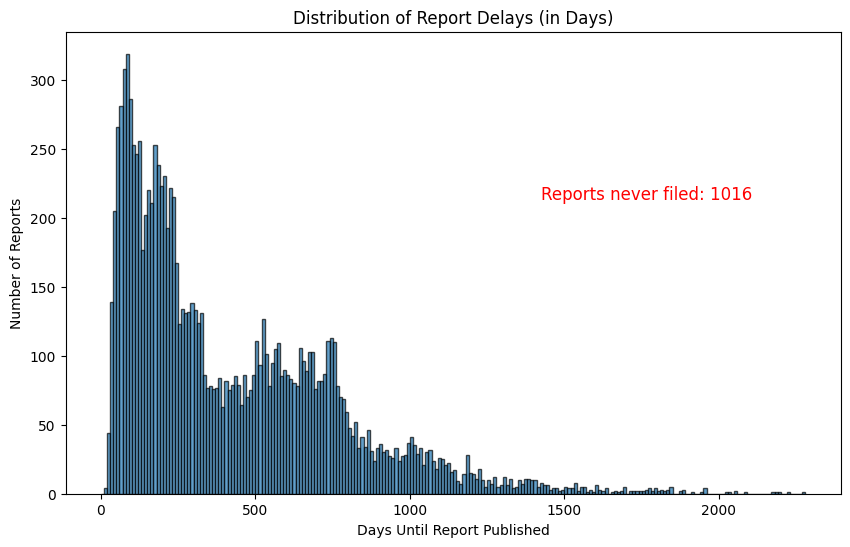

In [8]:
# calculate report delays
plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days
num_unpublished = plane_data['ReportDelay'].isna().sum()  # count missing reports

# drop NaN values
report_delays = plane_data['ReportDelay'].dropna()

# plot histogram
plt.figure(figsize=(10, 6))
bins = np.arange(0, report_delays.max() + 10, 10)  # Bin width of 10 days
plt.hist(report_delays, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel("Days Until Report Published")
plt.ylabel("Number of Reports")
plt.title("Distribution of Report Delays (in Days)")

# add caption for num of unfiled reports
plt.figtext(0.60, 0.60, f"Reports never filed: {num_unpublished}", fontsize=12, color='red')

plt.show()

C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\3840325368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days / 365


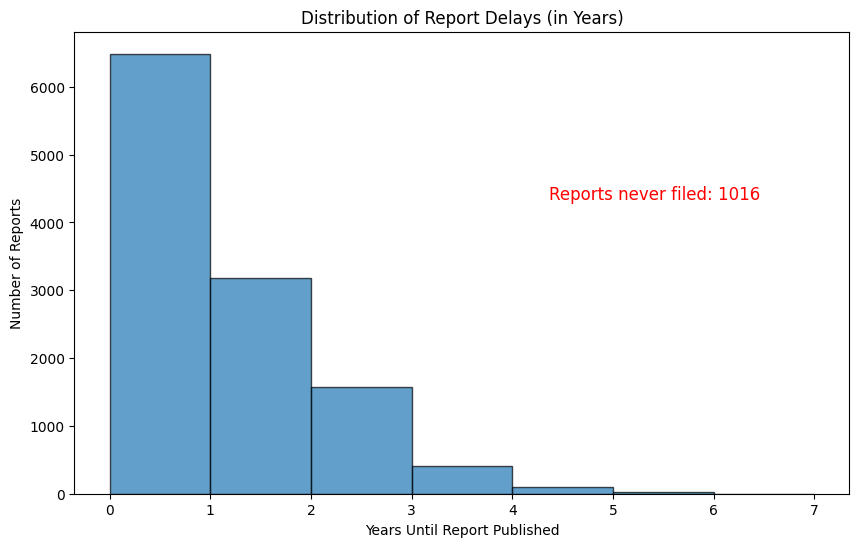

In [9]:
# calculate report delays in years
plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days / 365
num_unpublished = plane_data['ReportDelay'].isna().sum()  # Count missing reports

# drop NaN values
report_delays = plane_data['ReportDelay'].dropna()

# plot
plt.figure(figsize=(10, 6))
bins = np.arange(0, report_delays.max() + 1, 1)  # Bin width of 1 year
plt.hist(report_delays, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel("Years Until Report Published")
plt.ylabel("Number of Reports")
plt.title("Distribution of Report Delays (in Years)")

# Add caption for unpublished reports
plt.figtext(0.60, 0.60, f"Reports never filed: {num_unpublished}", fontsize=12, color='red')

plt.show()

In [10]:
# calculate the delay between event and report
plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days # OriginalPublishDate

# create bins for delays
bins = [-np.inf, 0, 30, 60, 90, 180, 365, np.inf]
labels = ['Same Day', '1-30 days', '31-60 days', '61-90 days', '91-180 days', '181-365 days', '1+ year']
plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)

# assign 'Not Filed' for missing values
plane_data['DelayCategory'] = plane_data['DelayCategory'].cat.add_categories(['Not Filed']).fillna('Not Filed')

# group by event year and delay category
heatmap_data = plane_data.groupby([plane_data['EventDate'].dt.year, 'DelayCategory']).size().unstack()

heatmap_data

C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\1301665042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days # OriginalPublishDate
C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\1301665042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)
C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\1301665042.py:10: SettingWithC

DelayCategory,Same Day,1-30 days,31-60 days,61-90 days,91-180 days,181-365 days,1+ year,Not Filed
EventDate,,,,,,,,
2015,0,22,160,169,234,220,505,2
2016,0,9,131,167,252,224,558,2
2017,0,1,34,174,214,249,658,0
2018,0,0,1,27,173,351,796,2
2019,0,0,0,0,116,415,771,0
2020,0,0,0,9,92,437,585,16
2021,0,0,25,41,223,380,543,3
2022,0,5,45,134,330,169,585,2
2023,0,6,128,106,275,182,277,244


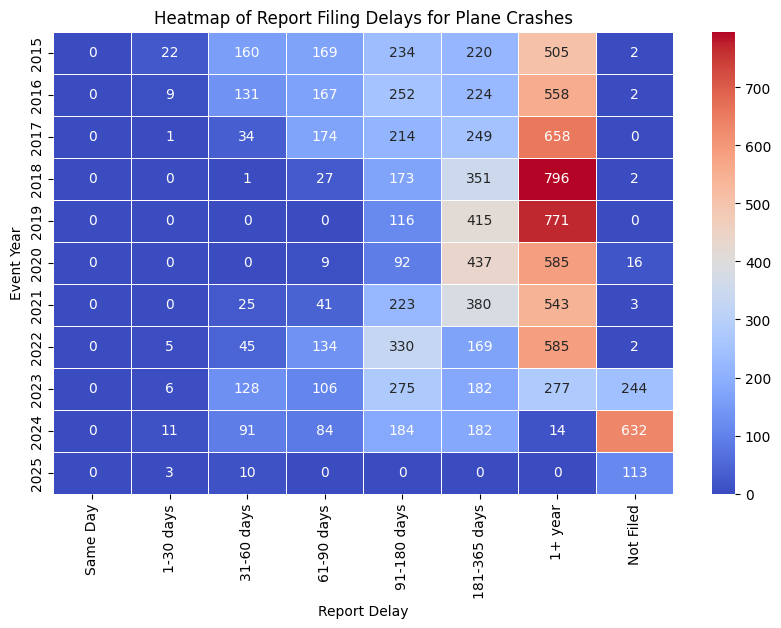

In [13]:
# plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.xlabel('Report Delay')
plt.ylabel('Event Year')
plt.title('Heatmap of Report Filing Delays for Plane Crashes')
plt.show()

In [14]:
bins = [-np.inf, 0, 30, 60, 90, 180, 365, np.inf]
labels = ['Same Day', '1-30 days', '31-60 days', '61-90 days', '91-180 days', '181-365 days', '1+ year']
plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)

# assign 'Not Filed' for missing values
plane_data['DelayCategory'] = plane_data['DelayCategory'].cat.add_categories(['Not Filed']).fillna('Not Filed')

# group by event year and delay category
heatmap_data = plane_data.groupby([plane_data['EventDate'].dt.year, 'DelayCategory']).size().unstack()

# calculate by percentage
heatmap_data_percentage = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

heatmap_data_percentage

C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\1265511378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)
C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\1265511378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['DelayCategory'] = plane_data['DelayCategory'].cat.add_categories(['Not Filed']).fillna('Not Filed')
C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\1265511378.py:9: FutureWarning: The defa

DelayCategory,Same Day,1-30 days,31-60 days,61-90 days,91-180 days,181-365 days,1+ year,Not Filed
EventDate,,,,,,,,
2015,0.0,1.676829,12.195122,12.881098,17.835366,16.768293,38.490854,0.152439
2016,0.0,0.670141,9.754281,12.434847,18.763961,16.679077,41.548771,0.148920
2017,0.0,0.075188,2.556391,13.082707,16.090226,18.721805,49.473684,0.000000
2018,0.0,0.000000,0.074074,2.000000,12.814815,26.000000,58.962963,0.148148
2019,0.0,0.000000,0.000000,0.000000,8.909370,31.874040,59.216590,0.000000
2020,0.0,0.000000,0.000000,0.790167,8.077261,38.366989,51.360843,1.404741
2021,0.0,0.000000,2.057613,3.374486,18.353909,31.275720,44.691358,0.246914
2022,0.0,0.393701,3.543307,10.551181,25.984252,13.307087,46.062992,0.157480
2023,0.0,0.492611,10.509031,8.702791,22.577997,14.942529,22.742200,20.032841


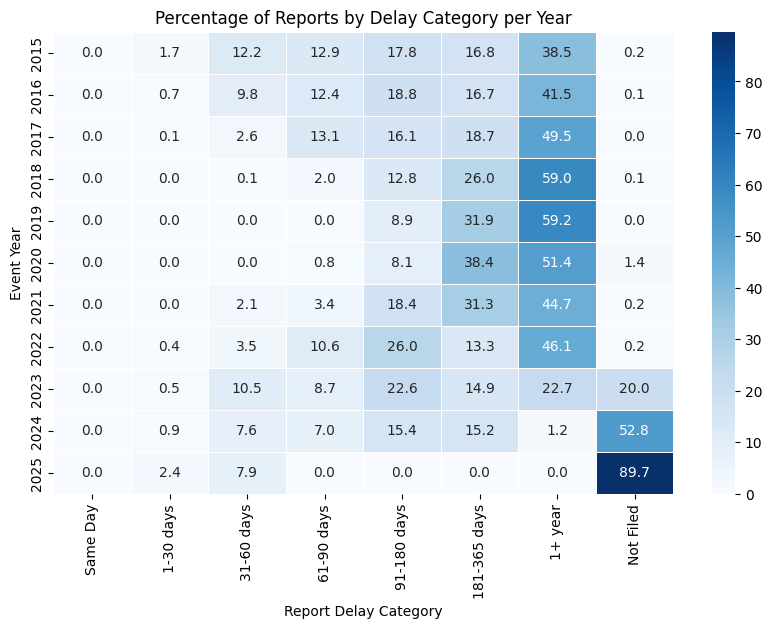

In [15]:
# resize
plt.figure(figsize=(10, 6))

# create heatmap
sns.heatmap(heatmap_data_percentage, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)

# labels and title
plt.xlabel("Report Delay Category")
plt.ylabel("Event Year")
plt.title("Percentage of Reports by Delay Category per Year")

# plot
plt.show()

C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\129487575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['Make'] = plane_data['Make'].str.strip().str.upper()
C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\129487575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days


<Figure size 1000x600 with 0 Axes>

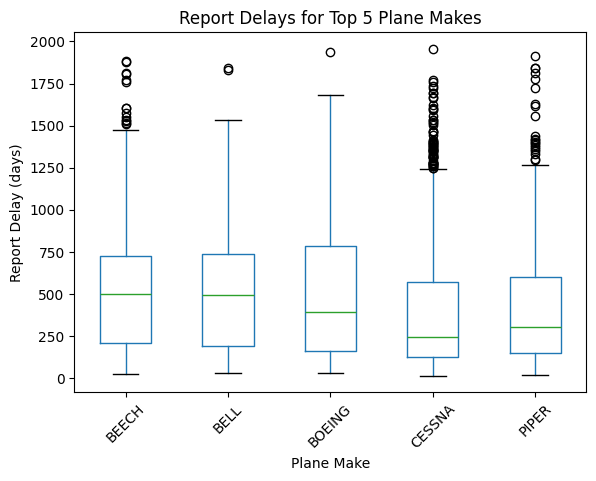

In [16]:
# stabdarduze make column
plane_data['Make'] = plane_data['Make'].str.strip().str.upper()

plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days

# Get top 5 most frequent plane makes
top_5_makes = plane_data['Make'].value_counts().head(5).index

# Filter data for only the top 5 makes
filtered_data = plane_data[plane_data['Make'].isin(top_5_makes)]

# Boxplot to visualize report delays for each of the top 5 plane makes
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='ReportDelay', by='Make', grid=False)
plt.title('Report Delays for Top 5 Plane Makes')
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Plane Make')
plt.ylabel('Report Delay (days)')
plt.xticks(rotation=45)
plt.show()

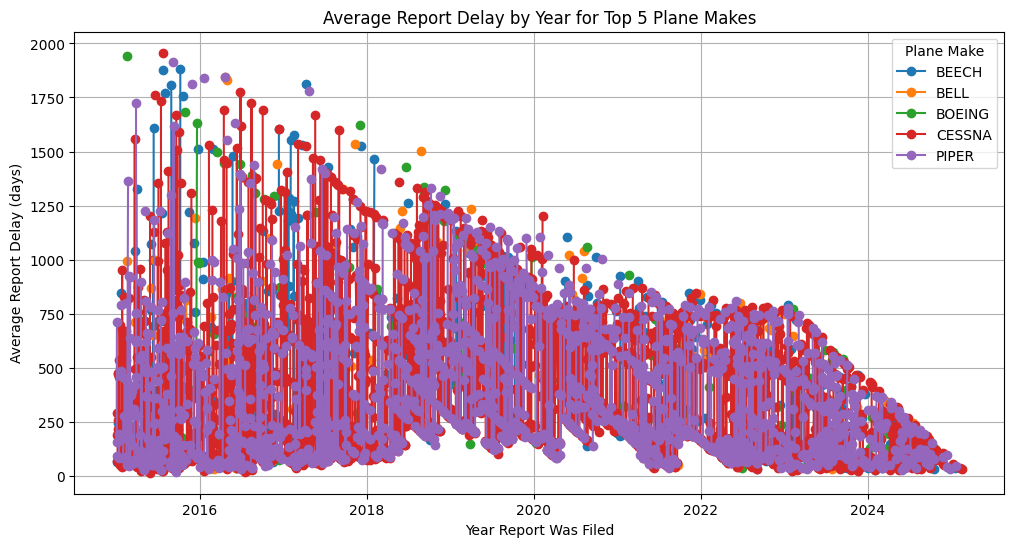

In [17]:
delay_trend = filtered_data.groupby(['EventDate', 'Make'])['ReportDelay'].mean().unstack()

# Plot
plt.figure(figsize=(12, 6))
for make in delay_trend.columns:
    plt.plot(delay_trend.index, delay_trend[make], marker='o', linestyle='-', label=make)

plt.title('Average Report Delay by Year for Top 5 Plane Makes')
plt.xlabel('Year Report Was Filed')
plt.ylabel('Average Report Delay (days)')
plt.legend(title='Plane Make')
plt.grid(True)
plt.show()

C:\Users\Oli\AppData\Local\Temp\ipykernel_25428\2516117180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_plane_data['ReportYear'] = new_plane_data['OriginalPublishedDate'].dt.year.astype(int)


<Figure size 1200x600 with 0 Axes>

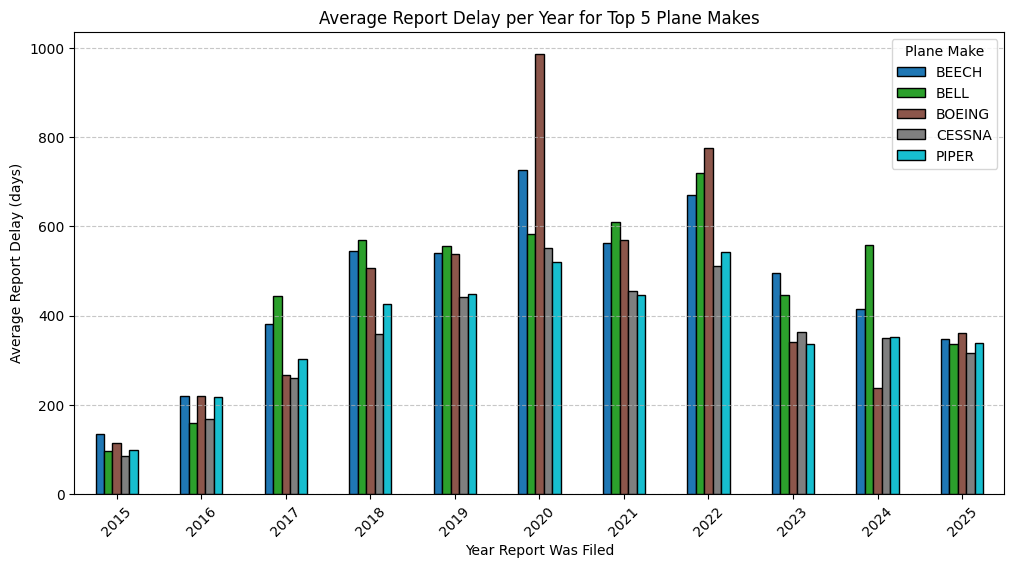

In [18]:
new_plane_data = plane_data.dropna(subset=['OriginalPublishedDate'])

new_plane_data['ReportYear'] = new_plane_data['OriginalPublishedDate'].dt.year.astype(int)

top_5_makes = new_plane_data['Make'].value_counts().head(5).index

filtered_data = new_plane_data[new_plane_data['Make'].isin(top_5_makes)]

avg_delay_per_year = filtered_data.groupby(['ReportYear', 'Make'])['ReportDelay'].mean().unstack()

# Plot: Grouped bar chart
plt.figure(figsize=(12, 6))
avg_delay_per_year.plot(kind='bar', figsize=(12, 6), colormap='tab10', edgecolor='black')

# Formatting
plt.title('Average Report Delay per Year for Top 5 Plane Makes')
plt.xlabel('Year Report Was Filed')
plt.ylabel('Average Report Delay (days)')
plt.legend(title='Plane Make')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()